# Принятие решений в бизнесе на основе данных

**Содержание**

[Описание проекта](#description)
1. [Общая информация](#start)
2. [Подготовка данных](#preprocessing)
3. [Приоритизация гипотез](#hypothesis) 
4. [Анализ A/B-теста](#test)  
    4.1. [График кумулятивной выручки по группам](#1)     
    4.2. [График кумулятивного среднего чека по группам](#2)    
    4.3. [График относительного изменения кумулятивного среднего чека группы B к группе A](#3)    
    4.4. [График кумулятивной конверсии по группам](#4)  
    4.5. [График относительного изменения кумулятивной конверсии группы B к группе A](#5)  
    4.6. [График количества заказов по пользователям](#6)  
    4.7. [Выбор границы для определения аномальных пользователей](#7)  
    4.8. [График стоимостей заказов](#8)  
    4.9. [Выбор границы для определения аномальных заказов](#9)  
    4.10. [Статистическая значимость различий в конверсии между группами по «сырым» данным](#10)  
    4.11. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#11)  
    4.12. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#12)  
    4.13. [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#13)  
5. [Общие выводы](#conclusion)  

## Описание проекта <a id="descriptiont"></a>

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез**
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.  
**Задача**
* Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.  
**Задача**
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Описание данных**

**Данные для первой части**

Файл `/datasets/hypothesis.csv`  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части** 

Файл `/datasets/orders.csv`  
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

Файл `/datasets/visitors.csv`  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

## 1. Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Вывод
План подготовки данных для анализа:  

* переименовать столбцы в таблицах: привести к нижнему регистру,  
* преобразовать данные в столбцах с датами в формат даты,  
* проверить совпадают ли диапазоны дат в таблицах `orders` и `visitors`,
* проверить таблицы на наличие дублей.  

## 2. Подготовка данных <a id="preprocessing"></a>

Приведем названия столбцов к нижнему регистру.

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [9]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [10]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Преобразуем данные в столбцах с датами в формат даты.

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Рассмотрим диапазоны дат в таблицах `orders` и `visitors`.

In [12]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [13]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Продолжительность A/B-теста - один месяц: с 01.08.2019 по 31.08.2019. Диапазоны дат в таблицах совпадают.

Проверим таблицы `orders` и `visitors` на дубликаты.

In [14]:
orders.duplicated().sum()

0

In [15]:
orders['transaction_id'].duplicated().sum()

0

In [16]:
visitors.duplicated().sum()

0

In [17]:
visitors.duplicated(subset=['date', 'group']).sum()

0

### Вывод
* Переименованы столбцы в таблицах.  
* Данные в столбцах с датами преобразованы в формат datetime.  
* Диапазоны дат в таблицах `orders` и `visitors` совпадают.  
* Дубликатов в таблицах нет.

## 3. Приоритизация гипотез <a id="hypothesis"></a>

In [18]:
pd.set_option('max_colwidth', 120)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Рассчитаем ICE для гипотез по формуле: $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [19]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Рассчитаем RICE для гипотез по формуле: $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [20]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [21]:
pd.reset_option('max_colwidth')

### Вывод
Наиболее перспективные гипотезы по ICE: 8, 0, 7. По RICE - это 7, 2, 0, 6. Седьмая гипотеза оказалась на первом месте, тогда как 8 сместилась на 5 позицию. Так получилось, потому что у 7 гипотезы параметр Reach максимальный = 10, тогда как у других меньше, например, у 8 гипотезы равен 1.

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

## 4. Анализ A/B-теста <a id="test"></a>

### 4.1. График кумулятивной выручки по группам <a id="1"></a>

Cоберем кумулятивные данные, объявим датафрейм `cumulativeData` со столбцами:
* `date` — дата;
* `group` — группа A/B-теста (A или B);
* `orders` — количество заказов в указанную дату в указанной группе;
* `buyers` — количество пользователей, совершивших хотя бы 1 заказ в указанную дату в указанной группе;
* `revenue` — выручка в указанную дату в указанной группе (средний чек);
* `visitors` — количество посетителей интернет-магазина в указанную дату в определённой группе.  

Создадим массив уникальных пар значений дат и групп теста.

In [22]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.

In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'transaction_id' : pd.Series.nunique, 
        'visitor_id' : pd.Series.nunique, 
        'revenue' : 'sum'
    }), 
    axis=1
).sort_values(by=['date','group'])

In [24]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [25]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'
    }), 
    axis=1
).sort_values(by=['date','group']) 

In [26]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим обе таблицы в одной с понятными названиями столбцов.

In [27]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

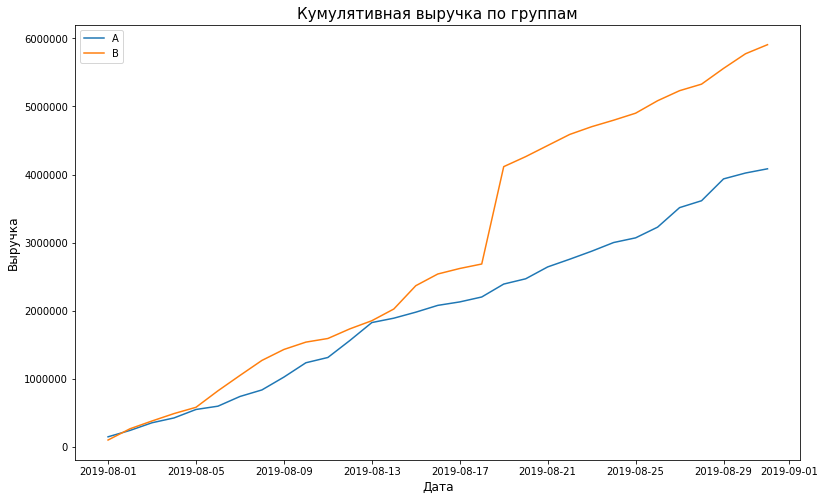

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам', fontsize = 15)
plt.ylabel('Выручка', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.show()

### Вывод
Выручка увеличивается в течение всего теста. После 17.08.2018 на графике В выручка резко растет, что может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов. Необходим анализ выбросов.

### 4.2. График кумулятивного среднего чека по группам <a id="2"></a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

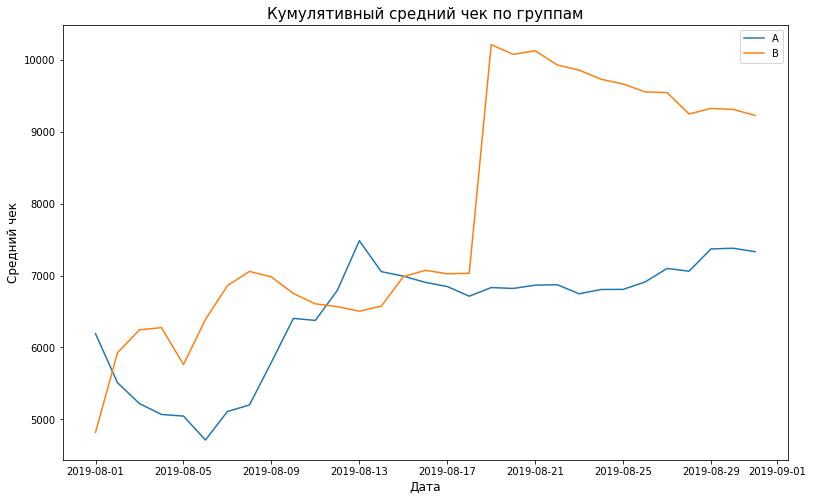

In [29]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Кумулятивный средний чек по группам', fontsize = 15)
plt.ylabel('Средний чек', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.show()

### Вывод
Средний чек группы А становится равномерным ближе к концу теста, тогда как у группы В резкий всплеск на графике и понижение. Возможно, в группу B после 17.08.2019 попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### 4.3. График относительного изменения кумулятивного среднего чека группы B к группе A <a id="3"></a>

Построим график относительного различия для среднего чека. 

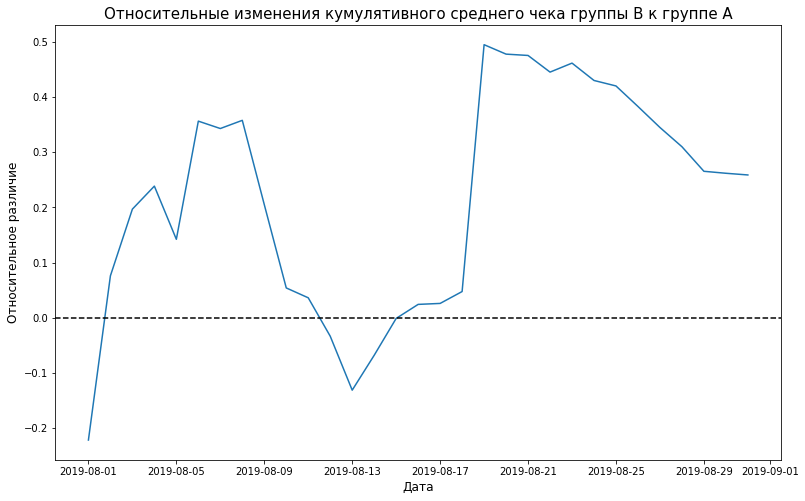

In [30]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A', fontsize = 15)
plt.ylabel('Относительное различие', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.show()

### Вывод
График различия между сегментами резко «скачет», результаты значительно и резко меняются в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

### 4.4. График кумулятивной конверсии по группам <a id="4"></a>

Аналогично проанализируем график кумулятивной конверсии.

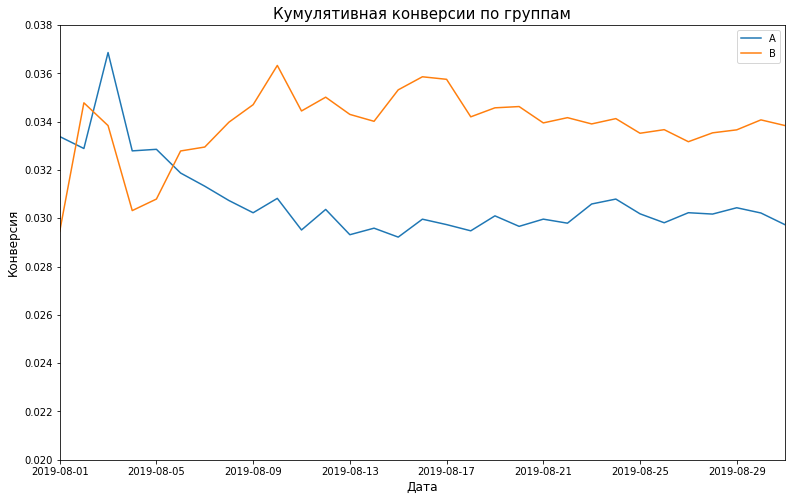

In [31]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.038])
plt.title('Кумулятивная конверсии по группам', fontsize = 15)
plt.ylabel('Конверсия', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.show()

### Вывод
Уже в первой половине теста конверсия группы В вырвалась вперед и в конце теста конверсия установилась около своих средних значений, больше конверсии А. Конверсия группы А также зафиксировалась.

### 4.5. График относительного изменения кумулятивной конверсии группы B к группе A <a id="5"></a>

Построим график относительного различия кумулятивных конверсий.

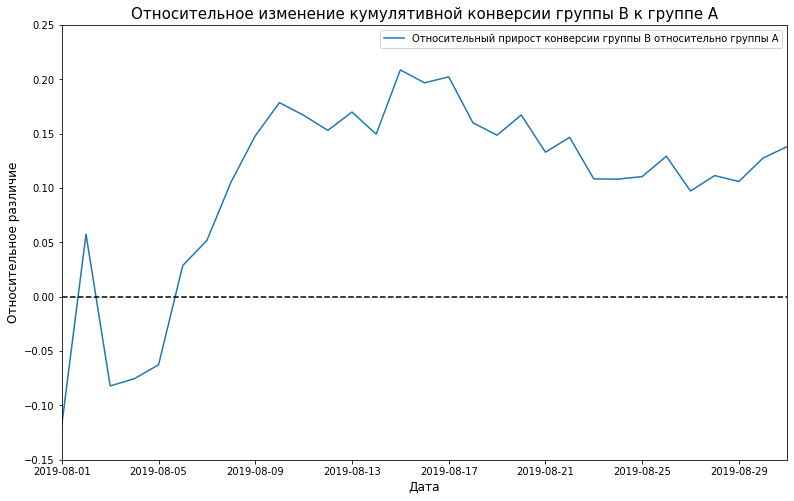

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date',
    how='left', 
    suffixes=['A', 'B']
)

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A', fontsize = 15)
plt.ylabel('Относительное различие', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.show()

### Вывод
Почти с самого начала теста группа В выигрывает по конверсии. В целом отношение конверсии ещё не установилось, но стоит ожидать, что конверсия группы В не понизится и будет выше конверсии группы А. Однако, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

### 4.6. График количества заказов по пользователям <a id="6"></a>

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального.  
Подсчитаем количество заказов по пользователям и посмотрим на результат.

In [33]:
ordersByUsers = orders.drop(
    ['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsers.columns = ['visitor_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9, 11 заказов. 
Построим гистрограмму распределения количества заказов на одного пользователя.

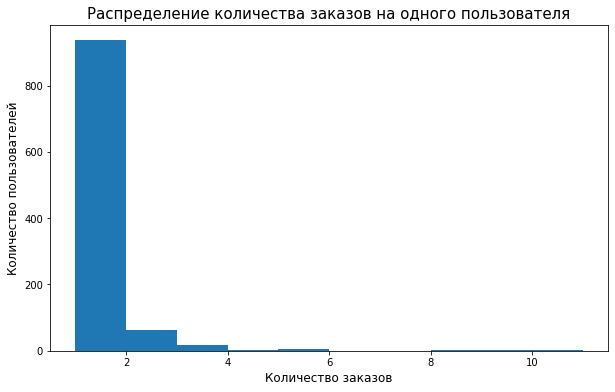

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(ordersByUsers['orders'])
plt.title('Распределение количества заказов на одного пользователя', fontsize = 15)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xlabel('Количество заказов', fontsize=12)
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя.

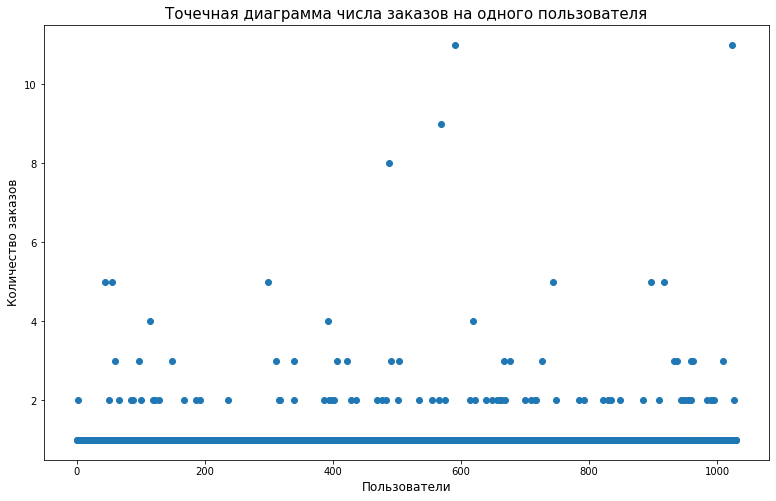

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя', fontsize = 15)
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Пользователи', fontsize=12)
plt.show()

### Вывод
Много пользователей с количеством заказов больше 2. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Вычислим 95 и 99 перцентили количества заказов на одного пользователя.

### 4.7. Выбор границы для определения аномальных пользователей <a id="7"></a>

Посчитаем 95 и 99 перцентили количества заказов на одного пользователя.

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

### Вывод 
Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей оформили больше 4 заказов. Выберем 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

### 4.8. График стоимостей заказов <a id="8"></a>

Изучим гистограмму распределения стоимостей заказов.

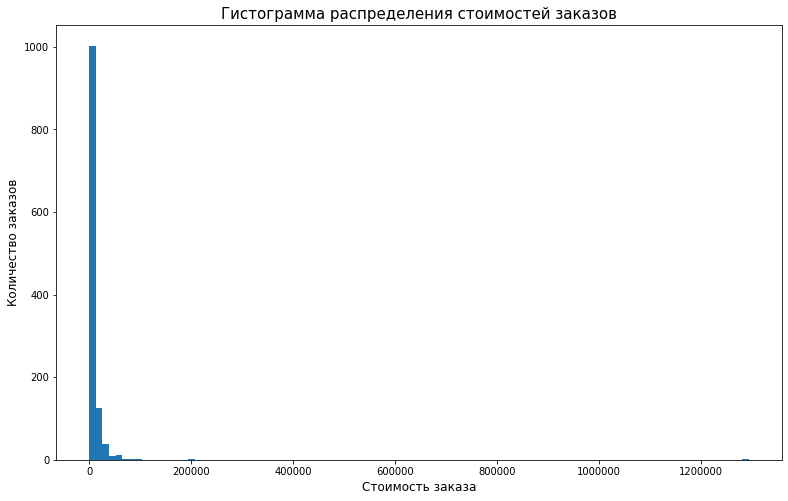

In [37]:
fig, ax = plt.subplots(figsize=(13,8))
ax.hist(orders['revenue'], bins=100)
plt.title('Гистограмма распределения стоимостей заказов', fontsize = 15)
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Стоимость заказа', fontsize=12)
plt.show()

В данных явно есть очень дорогие заказы — например, около 200 000, 1 300 000. Однако стоимость большинства заказов меньше 100 000.
Оценим стоимость заказов с помощью точечной диаграммы.

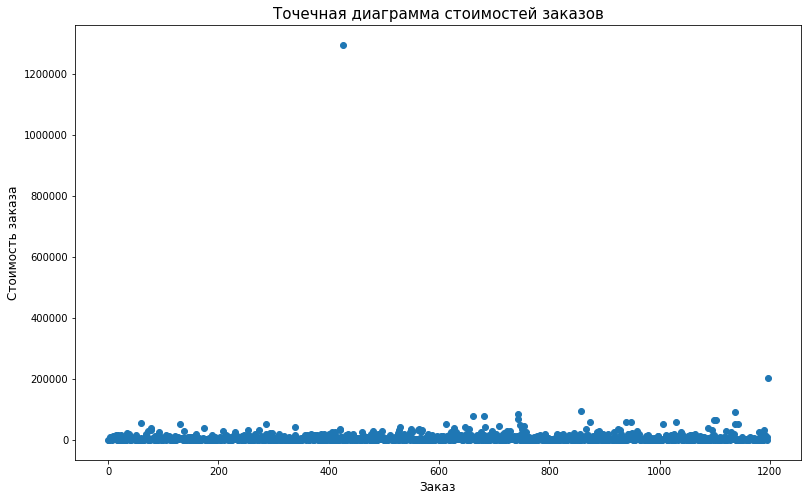

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимостей заказов', fontsize = 15)
plt.ylabel('Стоимость заказа', fontsize=12)
plt.xlabel('Заказ', fontsize=12)
# plt.axis([0, 1200, 0, 200000])
plt.show()

### Вывод
Всё, как предполагали: есть немного дорогих заказов. Отсеим от 1% до 5% наблюдений с крайними значениями.

### 4.9. Выбор границы для определения аномальных заказов <a id="9"></a>

Посчитаем 95 и 99 перцентили стоимостей заказов.

In [39]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

### Вывод
Выберем 50 000 за нижнюю границу стоимостей заказов, и отсеем аномальные заказы по ней.

### 4.10. Статистическая значимость различий в конверсии между группами по «сырым» данным <a id="10"></a>

Подготовим данные для подсчета статистической значимости различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

In [40]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({
        'date' : 'max', 
        'visitorsPerDateA' : 'sum'
    }), 
    axis=1
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({
        'date' : 'max', 
        'visitorsPerDateB' : 'sum'}), 
    axis=1
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False
).agg({
    'transaction_id' : pd.Series.nunique, 
    'revenue' : 'sum'
})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'
    }), 
    axis=1
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False
).agg(
    {'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'}
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({
        'date' : 'max',
        'ordersPerDateB' : 'sum',
        'revenuePerDateB' : 'sum'
    }), 
    axis=1
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(
    ordersBDaily, left_on='date', right_on='date', how='left'
).merge(
    ordersACummulative, left_on='date', right_on='date', how='left'
).merge(
    ordersBCummulative, left_on='date', right_on='date', how='left'
).merge(
    visitorsADaily, left_on='date', right_on='date', how='left'
).merge(
    visitorsBDaily, left_on='date', right_on='date', how='left'
).merge(
    visitorsACummulative, left_on='date', right_on='date', how='left'
).merge(
    visitorsBCummulative, left_on='date', right_on='date', how='left'
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов в таблице `data`:
* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsersB`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Для проверки наличия статистически значимых различий в конверсии между группами А и В применим метод `st.mannwhitneyu()` («U-критерий Манна-Уитни»).  
Нулевую гипотезу сформулируем следующим образом:  
**H₀ - статистически значимых различий в конверсии между группами А и В нет.**  
Альтернативная гипотеза будет звучать следующим образом:  
**H₁ - между группами А и В есть статистически значимые различия в конверсии.**  

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [42]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
    ],
    axis=0
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')
    ],
    axis=0
)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.  
В `sampleA` сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом `mean()`. Аналогично найдём конверсию группы B: `SampleB.mean()`.  
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [43]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


### Вывод
Р-value = 0.008 значительно меньше  0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B к группе А равен 13.8%.

### 4.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a id="11"></a>

Рассчитаем статистическую значимость различий в среднем чеке между сегментами, передав критерию `mannwhitneyu()` данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами.  
Нулевую гипотезу сформулируем следующим образом:  
**H₀ - статистически значимых различий в среднем чеке между группами А и В нет.**  
Альтернативная гипотеза будет звучать следующим образом:  
**H₁ - между группами А и В есть статистически значимые различия в среднем чеке.**  

In [44]:
print(
    "{0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
    )
)
print(
    "{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
    )
)

0.365
0.259


### Вывод
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A: на 25,9%: необходимо рассмотреть относительные различия в среднем чеке по "очищенным" данным.

### 4.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным <a id="12"></a>

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 50 000 рублей. Так мы уберём от 1% до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id']
    ], 
    axis = 0
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders],
    axis = 0
).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
(57,)


Всего 57 аномальных пользователей.  
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [46]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')
    ],
    axis=0
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')
    ],
    axis=0
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [47]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.148


### Вывод
Результаты по конверсии практически не изменились. В конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к группе А равен 14.8%.

### 4.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a id="13"></a>

Рассчитаем статистическую значимость различий в среднем чеке между сегментами по «очищенным» данным.

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.479
-0.020


### Вывод
P-value увеличился, а разница между сегментами сократилась и стала отрицательной с 0,259 до -0,02: относительный проигрыш среднего чека группы В к группе А равен 2%. Выбросы сильно искажали результаты А/В-теста.

## 5. Общий вывод <a id="conclusion"></a>

Результаты проведенного А/В-теста:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по сырым данным, ни по "очищенным".
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя. 

Исходя из обнаруженных фактов, следует остановить тест, зафиксировать победу группы В. Группы А и В не различаются по среднему чеку, но конверсия группы В выше, поэтому можно признать тест успешным.